In [2]:
import pandas as pd 
import numpy as np

def get_csv(path):
    df = pd.read_csv(path)
    return df

aisle = get_csv('./instacart_data/aisles.csv')
depart = get_csv('./instacart_data/departments.csv')
products = get_csv('./instacart_data/products.csv')
order_train = get_csv('./instacart_data/order_products__train.csv')
order_prior = get_csv('./instacart_data/order_products__prior.csv')

In [11]:
order_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [12]:
order_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [18]:
prior_train = pd.concat([order_train, order_prior], axis = 0)

In [19]:
prior_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 1.3 GB


In [20]:
prior_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [22]:
prior_train = pd.merge(prior_train, products, on='product_id')

In [23]:
prior_train

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16
...,...,...,...,...,...,...,...
33819101,3265099,43492,3,0,Gourmet Burger Seasoning,104,13
33819102,3361945,43492,19,0,Gourmet Burger Seasoning,104,13
33819103,3267201,33097,2,0,Piquillo & Jalapeno Bruschetta,81,15
33819104,3393151,38977,32,0,Original Jerky,100,21


In [24]:
prior_train = pd.merge(prior_train, depart, on='department_id')

In [25]:
prior_train

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs
1,816049,49302,7,1,Bulgarian Yogurt,120,16,dairy eggs
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,dairy eggs
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,dairy eggs
...,...,...,...,...,...,...,...,...
33819101,2532830,36577,15,1,Kitten Chow Nurture Kitten Food,41,8,pets
33819102,2610155,36577,7,0,Kitten Chow Nurture Kitten Food,41,8,pets
33819103,3387496,36577,4,0,Kitten Chow Nurture Kitten Food,41,8,pets
33819104,2412099,17113,9,0,Nutrish Naturally Delish Chicken Paw Pie Wet D...,40,8,pets


In [26]:
prior_train = pd.merge(prior_train, aisle, on = "aisle_id")

In [28]:
prior_train

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs,yogurt
1,816049,49302,7,1,Bulgarian Yogurt,120,16,dairy eggs,yogurt
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs,yogurt
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,dairy eggs,yogurt
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
...,...,...,...,...,...,...,...,...,...
33819101,2922902,30184,1,0,Adult Healthy Metabolism Cat Food,41,8,pets,cat food care
33819102,2175793,36577,3,0,Kitten Chow Nurture Kitten Food,41,8,pets,cat food care
33819103,2532830,36577,15,1,Kitten Chow Nurture Kitten Food,41,8,pets,cat food care
33819104,2610155,36577,7,0,Kitten Chow Nurture Kitten Food,41,8,pets,cat food care


In [29]:
graphing_df = prior_train[['order_id', 'add_to_cart_order', 'reordered', 'product_name', 'department', 'aisle']].copy()

In [30]:
graphing_df

,order_id,add_to_cart_order,reordered,product_name,department,aisle
0,1,1,1,Bulgarian Yogurt,dairy eggs,yogurt
1,816049,7,1,Bulgarian Yogurt,dairy eggs,yogurt
2,1242203,1,1,Bulgarian Yogurt,dairy eggs,yogurt
3,1383349,11,1,Bulgarian Yogurt,dairy eggs,yogurt
4,1787378,8,0,Bulgarian Yogurt,dairy eggs,yogurt
...,...,...,...,...,...,...
33819101,2922902,1,0,Adult Healthy Metabolism Cat Food,pets,cat food care
33819102,2175793,3,0,Kitten Chow Nurture Kitten Food,pets,cat food care
33819103,2532830,15,1,Kitten Chow Nurture Kitten Food,pets,cat food care
33819104,2610155,7,0,Kitten Chow Nurture Kitten Food,pets,cat food care


In [45]:
aisle_group = graphing_df.groupby('aisle').agg({'reordered':'count'}).sort_values('reordered', ascending = False).reset_index()

In [52]:
aisle_group['aisle'][:10]

0                     fresh fruits
1                 fresh vegetables
2       packaged vegetables fruits
3                           yogurt
4                  packaged cheese
5                             milk
6    water seltzer sparkling water
7                   chips pretzels
8                  soy lactosefree
9                            bread
Name: aisle, dtype: object

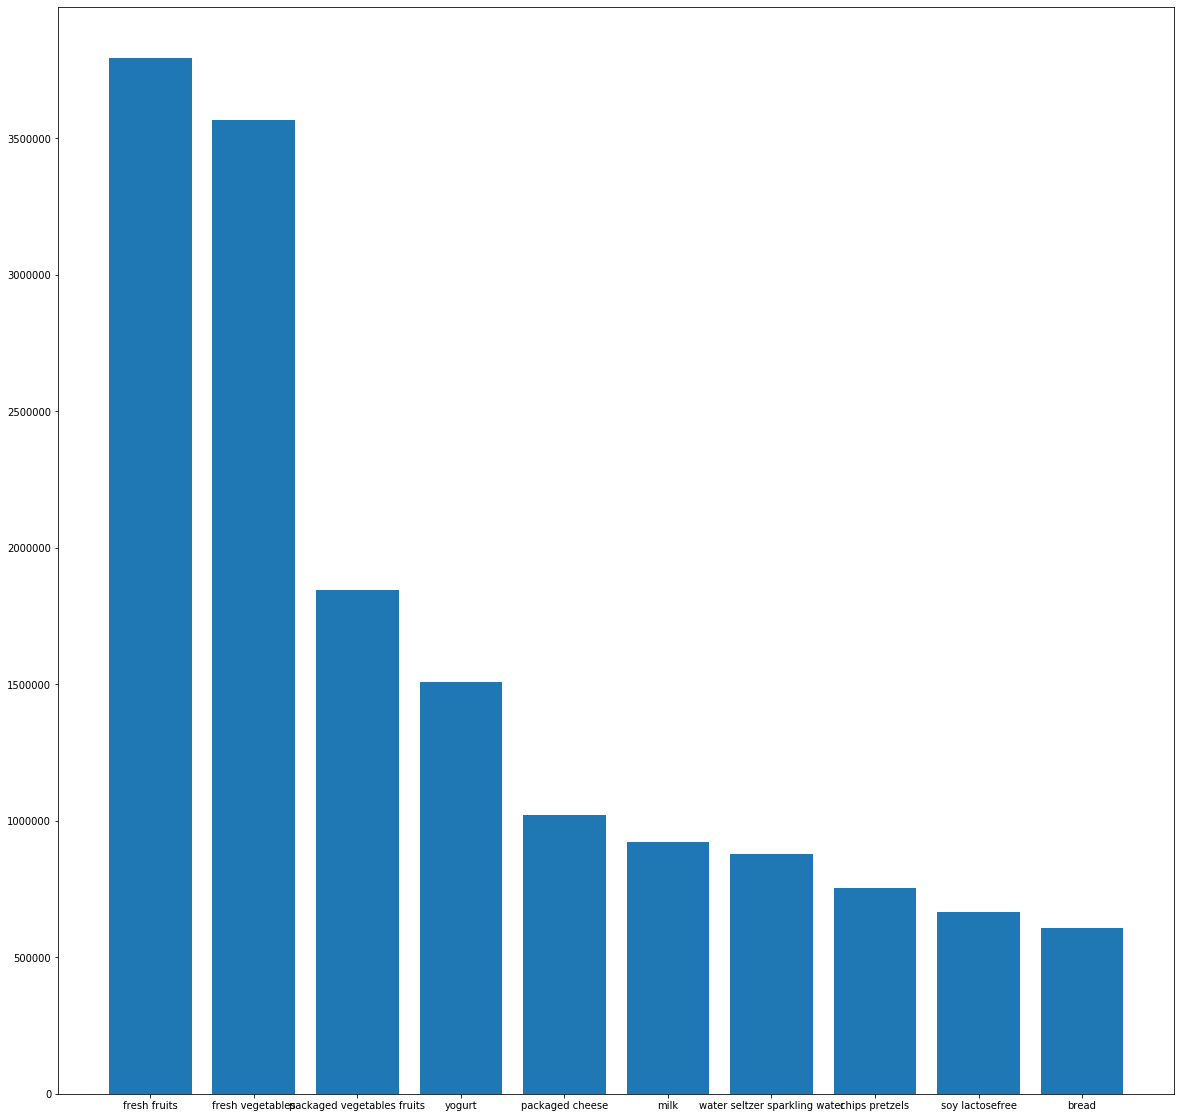

In [53]:
import matplotlib.pyplot as plt 

#top 10 highest reordered items 
fig, ax = plt.subplots(figsize = (20,20))
ax.bar(aisle_group['aisle'][:10], aisle_group['reordered'][:10]);

In [55]:
#top item into cart first 
graphing_df

,order_id,add_to_cart_order,reordered,product_name,department,aisle
0,1,1,1,Bulgarian Yogurt,dairy eggs,yogurt
1,816049,7,1,Bulgarian Yogurt,dairy eggs,yogurt
2,1242203,1,1,Bulgarian Yogurt,dairy eggs,yogurt
3,1383349,11,1,Bulgarian Yogurt,dairy eggs,yogurt
4,1787378,8,0,Bulgarian Yogurt,dairy eggs,yogurt
...,...,...,...,...,...,...
33819101,2922902,1,0,Adult Healthy Metabolism Cat Food,pets,cat food care
33819102,2175793,3,0,Kitten Chow Nurture Kitten Food,pets,cat food care
33819103,2532830,15,1,Kitten Chow Nurture Kitten Food,pets,cat food care
33819104,2610155,7,0,Kitten Chow Nurture Kitten Food,pets,cat food care


In [56]:
first_item = graphing_df[graphing_df['add_to_cart_order'] == 1]

In [57]:
first_item

,order_id,add_to_cart_order,reordered,product_name,department,aisle
0,1,1,1,Bulgarian Yogurt,dairy eggs,yogurt
2,1242203,1,1,Bulgarian Yogurt,dairy eggs,yogurt
17,262316,1,0,Bulgarian Yogurt,dairy eggs,yogurt
18,269385,1,1,Bulgarian Yogurt,dairy eggs,yogurt
21,312335,1,1,Bulgarian Yogurt,dairy eggs,yogurt
...,...,...,...,...,...,...
33819075,1651253,1,0,"Tender Moments, Salmon Flavor Cat Treats",pets,cat food care
33819096,1863944,1,0,Adult Healthy Metabolism Cat Food,pets,cat food care
33819097,1868551,1,1,Adult Healthy Metabolism Cat Food,pets,cat food care
33819099,2459350,1,0,Adult Healthy Metabolism Cat Food,pets,cat food care


In [65]:
first_item.groupby('product_name').agg({"add_to_cart_order":'count'}).sort_values('add_to_cart_order', ascending = False).reset_index()

,product_name,add_to_cart_order
0,Banana,115521
1,Bag of Organic Bananas,82877
2,Organic Whole Milk,32071
3,Organic Strawberries,28875
4,Organic Hass Avocado,24913
...,...,...
42183,Prime Cuts Svory Beef Dog Food,1
42184,Lucky Charms Marshmallow Flavor Treats,1
42185,Complete Skillet Meal For Two Beef & Broccoli,1
42186,Complete Sensitive All Day Moisturizer With SP...,1


In [66]:
first_item.groupby('aisle').agg({"add_to_cart_order":'count'}).sort_values('add_to_cart_order', ascending = False).reset_index()[:10]

,aisle,add_to_cart_order
0,fresh fruits,464029
1,fresh vegetables,247028
2,milk,196611
3,water seltzer sparkling water,168090
4,packaged vegetables fruits,147771
5,yogurt,139446
6,soy lactosefree,98175
7,refrigerated,76970
8,packaged cheese,69516
9,bread,65918


In [67]:
first_item.groupby('department').agg({"add_to_cart_order":'count'}).sort_values('add_to_cart_order', ascending = False).reset_index()[:10]

,department,add_to_cart_order
0,produce,937376
1,dairy eggs,676270
2,beverages,427869
3,snacks,233966
4,frozen,189927
5,pantry,160846
6,bakery,122330
7,deli,91839
8,household,88929
9,meat seafood,74293


In [70]:
#adding times
orders = get_csv('./instacart_data/orders.csv')

In [71]:
graphing_df = pd.merge(graphing_df, orders, on='order_id')

In [86]:
graphing_df['order_id'].nunique()

3346083

In [88]:
order_by_hour = graphing_df.groupby('order_hour_of_day').agg({'order_id':'count'}).sort_values('order_id').reset_index()
order_by_hour

,order_hour_of_day,order_id
0,3,53759
1,4,55714
2,2,72660
3,5,91909
4,1,121412
5,0,228031
6,6,302642
7,23,419585
8,22,662053
9,21,831183


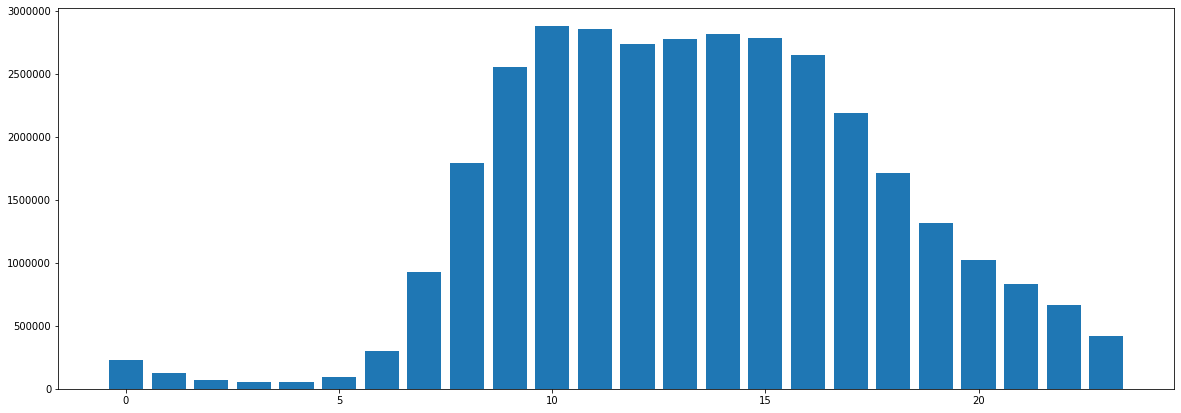

In [87]:
#top number of orders by hour 
fig, ax = plt.subplots(figsize = (20,7))

ax.bar(order_by_hour['order_hour_of_day'], order_by_hour['order_id']);

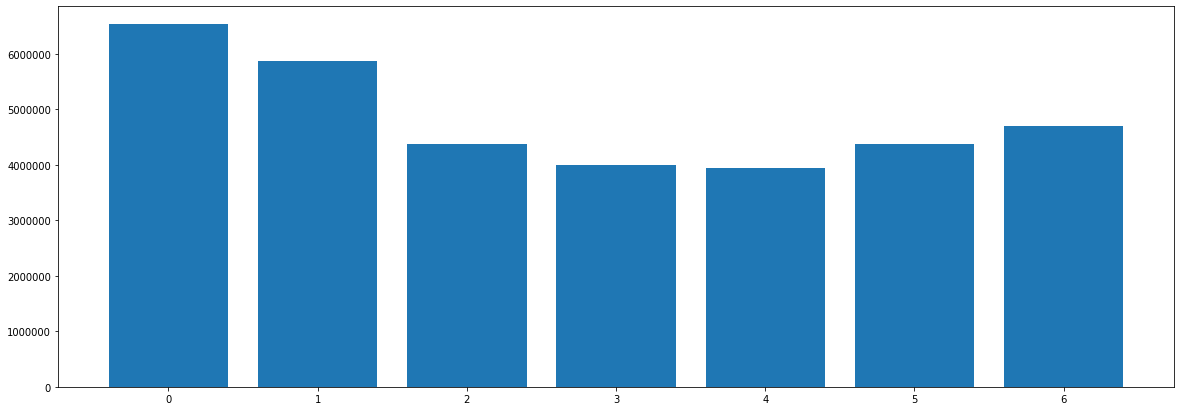

In [90]:
order_by_day = graphing_df.groupby('order_dow').agg({'order_id':'count'}).sort_values('order_id').reset_index()

#top number of orders by day 
fig, ax = plt.subplots(figsize = (20,7))

ax.bar(order_by_day['order_dow'], order_by_day['order_id']);

In [92]:
graphing_df

,order_id,add_to_cart_order,reordered,product_name,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,1,1,Bulgarian Yogurt,dairy eggs,yogurt,112108,train,4,4,10,9.0
1,1,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,dairy eggs,other creams cheeses,112108,train,4,4,10,9.0
2,1,8,1,Organic Whole String Cheese,dairy eggs,packaged cheese,112108,train,4,4,10,9.0
3,1,3,0,Organic Celery Hearts,produce,fresh vegetables,112108,train,4,4,10,9.0
4,1,4,0,Cucumber Kirby,produce,fresh vegetables,112108,train,4,4,10,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,2055631,1,1,Proactive Health Hairball Care Adult Cat Food,pets,cat food care,46644,prior,6,6,15,30.0
33819102,2887868,1,0,Adult Urinary Tract Health Formula Dry Cat Food,pets,cat food care,185782,prior,3,6,15,30.0
33819103,2870334,1,0,High Protein Advanced Formula Cat Food,pets,cat food care,189720,prior,4,5,16,8.0
33819104,2964261,1,1,Healthy Naturals Dry Cat Chicken,pets,cat food care,67169,prior,16,6,13,6.0


In [109]:
hour10 = graphing_df[graphing_df['order_hour_of_day'] == 10]
hour10

,order_id,add_to_cart_order,reordered,product_name,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,1,1,Bulgarian Yogurt,dairy eggs,yogurt,112108,train,4,4,10,9.0
1,1,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,dairy eggs,other creams cheeses,112108,train,4,4,10,9.0
2,1,8,1,Organic Whole String Cheese,dairy eggs,packaged cheese,112108,train,4,4,10,9.0
3,1,3,0,Organic Celery Hearts,produce,fresh vegetables,112108,train,4,4,10,9.0
4,1,4,0,Cucumber Kirby,produce,fresh vegetables,112108,train,4,4,10,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33818970,2719031,1,0,Grilled Beef Feast in Gravy Cat Food,pets,cat food care,60225,prior,8,0,10,29.0
33818973,1468014,2,1,Tasty Chicken Flavor Treats for Cat,pets,cat food care,113063,prior,6,4,10,26.0
33818974,1468014,1,1,ProActive Health Adult Chicken Dry Cat Food,pets,cat food care,113063,prior,6,4,10,26.0
33819062,2681486,1,1,Prime Filets with Beef in Gravy Cat Food,pets,cat food care,19886,prior,5,0,10,28.0


In [106]:
hour10['product_name'].value_counts().reset_index()[:20]

,index,product_name
0,Banana,42234
1,Bag of Organic Bananas,33063
2,Organic Strawberries,21995
3,Organic Baby Spinach,20566
4,Organic Hass Avocado,17847
5,Organic Avocado,15027
6,Large Lemon,13764
7,Strawberries,12763
8,Limes,12454
9,Organic Raspberries,11937


In [107]:
hour15 = graphing_df[graphing_df['order_hour_of_day'] == 15]
hour15['product_name'].value_counts().reset_index()[:20]

,index,product_name
0,Banana,39700
1,Bag of Organic Bananas,32253
2,Organic Strawberries,22422
3,Organic Baby Spinach,20830
4,Organic Hass Avocado,18844
5,Organic Avocado,15477
6,Large Lemon,13655
7,Limes,12640
8,Strawberries,12001
9,Organic Whole Milk,11496


In [120]:
hour15

,order_id,add_to_cart_order,reordered,product_name,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
232,262316,1,0,Bulgarian Yogurt,dairy eggs,yogurt,117825,prior,6,6,15,18.0
233,262316,2,1,Cage Free Grade A Large Brown Eggs,dairy eggs,eggs,117825,prior,6,6,15,18.0
234,262316,3,1,Unsalted Pure Irish Butter,dairy eggs,butter,117825,prior,6,6,15,18.0
235,262316,10,1,Organic Whole Milk,dairy eggs,milk,117825,prior,6,6,15,18.0
236,262316,4,1,Organic Yellow Onion,produce,fresh vegetables,117825,prior,6,6,15,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33819040,1896753,1,0,Lightweight Extreme Scented Cat Litter,pets,cat food care,183315,prior,1,6,15,NaN
33819093,1527209,1,1,Super Mega Savory Salmon Flavor Cat Treat,pets,cat food care,173885,prior,13,6,15,30.0
33819097,854076,1,1,Kat Kit Disposable Tray,pets,cat food care,121122,prior,3,6,15,2.0
33819101,2055631,1,1,Proactive Health Hairball Care Adult Cat Food,pets,cat food care,46644,prior,6,6,15,30.0


In [127]:
hour20 = graphing_df[graphing_df['order_hour_of_day'] == 20]
hour20_topproduct = hour20.groupby('product_name').agg({'order_id':'count'}).sort_values("order_id", ascending = False).reset_index()

In [130]:
hour20_topproduct['order_id'].sum()

1017958

In [133]:
hour20_topproduct['percent'] = (hour20_topproduct['order_id'] / 1017958) * 100

In [134]:
hour20_topproduct

,product_name,order_id,percent
0,Banana,15102,1.483558
1,Bag of Organic Bananas,12086,1.187279
2,Organic Strawberries,9079,0.891884
3,Organic Baby Spinach,7812,0.767419
4,Organic Hass Avocado,6993,0.686964
...,...,...,...
35068,Garden Ranch Broccoli Bites,1,0.000098
35069,Signature Egg Sausage & Cheese Burritos,1,0.000098
35070,Black Pepper Grinder,1,0.000098
35071,Signature Classics Southwest-Style Chicken Panini,1,0.000098
